Follow along Qiskit code in "Quantum Simulation of Open Quantum Systems Using a Unitary Decomposition of Operators" paper by Schlimgen et. al (2021), which is a key reference for the group's next paper "Quantum simulation of the Lindblad equation using a unitary decomposition of operators" (2022).

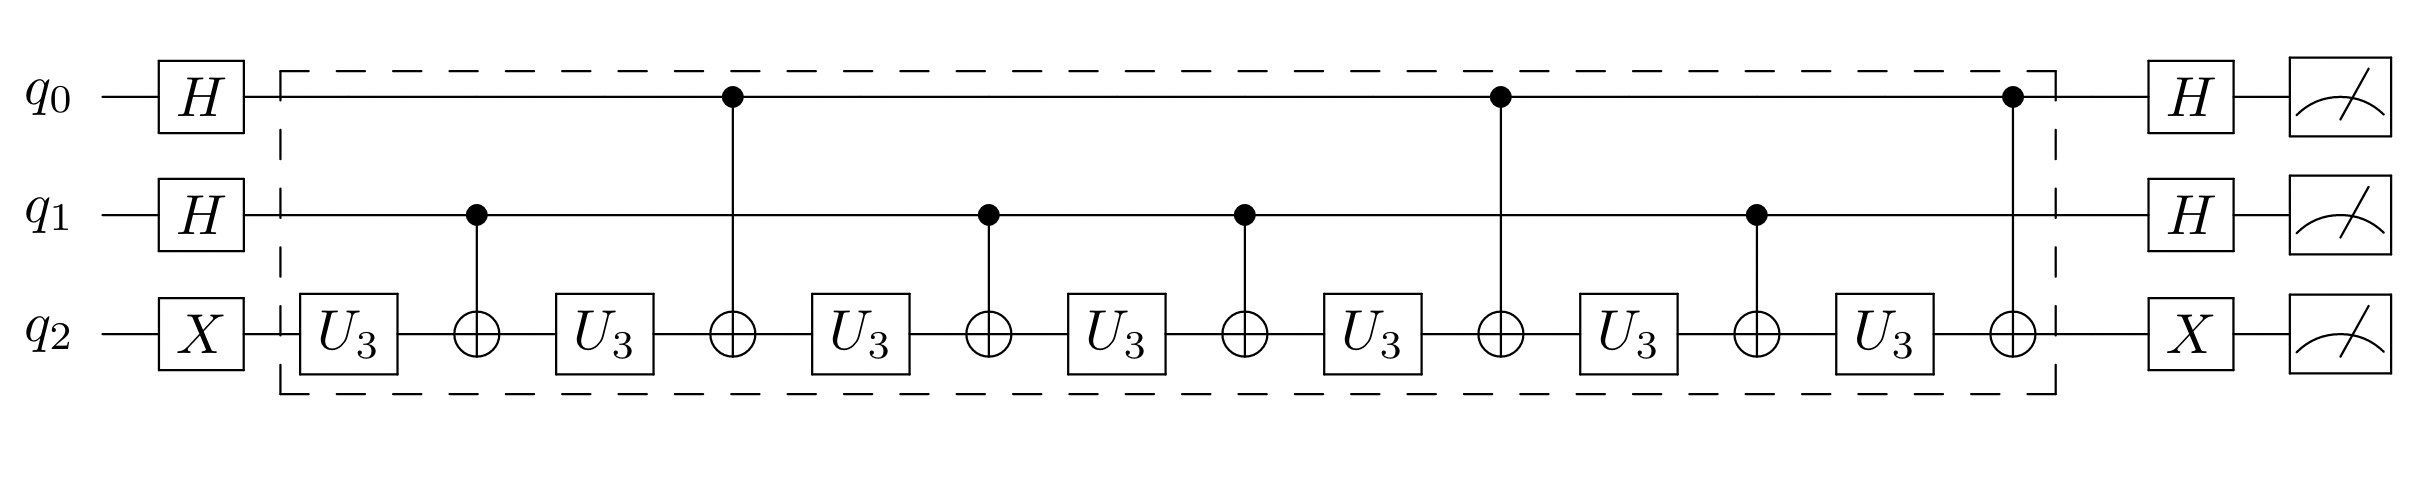

Key result: "Because the time evolution of an open quantum system employs a non-unitary operator, the simulation of open quantum systems presents a challenge for universal quantum computers constructed from only unitary operators or gates. Here we present a general algorithm for implementing the action of any non-unitary operator on an arbitrary state on a quantum device." 

In [2]:
# import these headers to run Qiskit
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

import numpy as np
import math

/var/folders/p3/gy95rxqn14gdk9cx0v_db7gw0000gq/T/ipykernel_11254/549932296.py:11: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  circ.u3(angles[0],angles[1],angles[2],2)


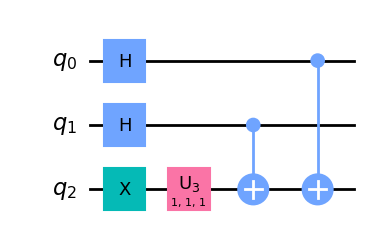

In [3]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

circ.h(0)
circ.h(1)
circ.x(2)

angles = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]   # dummy values, need 21 angles

# Generic single qubit three Euler angle rotation gate
circ.u3(angles[0],angles[1],angles[2],2)

circ.cx(1, 2)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

circ.draw("mpl")

### Any operator M can be decomposed into a Hermitian and anti-Hermitian component.

Hermitian: $H^\dagger = H$ ; anti-Hermitian: $H^\dagger = -H$

$A = \frac{A + A^\dagger}{2} + \frac{A - A^\dagger}{2} = B + C$

Hermitian:
$B^\dagger = \frac{A^\dagger + A}{2} = B$

Anti-Hermitian:
$C^\dagger = \frac{A^\dagger - A}{2} = -C$

Propagator $U = 
\begin{pmatrix}
S_m & 0 & 0 & 0\\
0 & -S_p & 0 & 0\\
0 & 0 & -A_m & 0\\
0 & 0 & 0 & A_p
\end{pmatrix}
$

### Qiskit migration --> need to check compatibility

https://qiskit.org/documentation/stable/0.32/aqua_tutorials/Qiskit%20Algorithms%20Migration%20Guide.html

In [88]:
M = np.sqrt(0.5)*np.array([[1, 0],[0, 1]])
print(M)

[[0.70710678 0.        ]
 [0.         0.70710678]]


In [113]:
# Compute Hermitian and anti-Hermitian parts
M_t = M.transpose()
S = 0.5*(M + M_t)
A = 0.5*(M_t - M)
print("Hermitian component:\n", S)
print("\nAnti-Hermitian component:\n", A)

Hermitian component:
 [[0.70710678 0.        ]
 [0.         0.70710678]]

Anti-Hermitian component:
 [[0. 0.]
 [0. 0.]]


In [118]:
epsilon = 0.0001   
Sm = 1j*np.exp(-1j*epsilon*S)
Sp = -1*Sm.transpose()
Am = np.exp(-epsilon*A)
Ap = Am

dim_M = len(M) # dimension of original M matrix

U = np.zeros((4*dim_M,4*dim_M),dtype = 'complex_')   # specify to allow complex
for i in range(dim_M):
    for j in range(dim_M):
        U[i][j] = Sm[i][j]
        U[i+dim_M][j+dim_M] = -Sp[i][j]
        U[i+2*dim_M][j+2*dim_M] = -Am[i][j]
        U[i+3*dim_M][j+3*dim_M] = Ap[i][j]

print("Propagator U:")
print(np.round(U,4))          

Propagator U:
[[ 1.e-04+1.j  0.e+00+1.j  0.e+00+0.j  0.e+00+0.j  0.e+00+0.j  0.e+00+0.j
   0.e+00+0.j  0.e+00+0.j]
 [ 0.e+00+1.j  1.e-04+1.j  0.e+00+0.j  0.e+00+0.j  0.e+00+0.j  0.e+00+0.j
   0.e+00+0.j  0.e+00+0.j]
 [ 0.e+00+0.j  0.e+00+0.j  1.e-04+1.j  0.e+00+1.j  0.e+00+0.j  0.e+00+0.j
   0.e+00+0.j  0.e+00+0.j]
 [ 0.e+00+0.j  0.e+00+0.j  0.e+00+1.j  1.e-04+1.j  0.e+00+0.j  0.e+00+0.j
   0.e+00+0.j  0.e+00+0.j]
 [ 0.e+00+0.j  0.e+00+0.j  0.e+00+0.j  0.e+00+0.j -1.e+00+0.j -1.e+00+0.j
   0.e+00+0.j  0.e+00+0.j]
 [ 0.e+00+0.j  0.e+00+0.j  0.e+00+0.j  0.e+00+0.j -1.e+00+0.j -1.e+00+0.j
   0.e+00+0.j  0.e+00+0.j]
 [ 0.e+00+0.j  0.e+00+0.j  0.e+00+0.j  0.e+00+0.j  0.e+00+0.j  0.e+00+0.j
   1.e+00+0.j  1.e+00+0.j]
 [ 0.e+00+0.j  0.e+00+0.j  0.e+00+0.j  0.e+00+0.j  0.e+00+0.j  0.e+00+0.j
   1.e+00+0.j  1.e+00+0.j]]


Matrix formed by binary encoding and Gray code: $
M_{ij} = 2^{-k} (-1)^{b_{j-1} g_{i-1}}   $
### Check indices! $M_{11}$ on paper is M[0][0] in code

In [96]:
# Implementing eq. 3 of Mottonen et al. 2008 
NUM_QUBITS = 2  # number of qubits


# ==================== Equations ====================

#print(M)
#print(M[1])


# binary encoding
def binary_minus(j):    # returns a string
    if j >= 2**NUM_QUBITS:
        print("Error: binary_minus input too large")
        return -1
    
    if j > 0:
        test_string = str(bin(j-1)[2:])
    elif j == 0:
        test_string = str(bin(2**NUM_QUBITS-1)[2:]) 
        #print("Debug:", test_string)
        
    if len(test_string) < NUM_QUBITS:
        for i in range(NUM_QUBITS - len(test_string)):
            test_string = "0" + test_string
            # to add leading zeros as required
    return test_string


# generator function for Gray code
def GrayCodeList():
    # Code modified from https://www.geeksforgeeks.org/generate-n-bit-gray-codes/
    gray_list = []
    for i in range(2**NUM_QUBITS):  # power of 2
        # Generate decimal values of gray code then use
        # bitset to convert them to binary form
        val = (i ^ (i >> 1))
        s = bin(val)[2::]
        gray_list.append(s.zfill(NUM_QUBITS))
    return gray_list


# reflected Gray code
def gray_minus(i):
    # returns as string
    if i >= 2**NUM_QUBITS:
        print("Error: gray_minus input too large")
        return -1
    
    full_gray_code = GrayCodeList()
    if i > 0:
        return str(full_gray_code[i-1])
    else:
        return str(full_gray_code[-1]) # last element
    

def make_M(i,j):
    # calculates the M[i][j]th element of the matrix
    bj_minus = binary_minus(j) # strings
    gi_minus = gray_minus(i)
    if len(bj_minus) != len(gi_minus): # check
        print("Error: length of b_(j-1) does not match g_(i-1) strings at (i,j)=",i,j)
        print("bj_minus:", bj_minus, "    gi_minus:", gi_minus)
        return -1
    
    # dot product, need to deal with leading zeros
    exp = 0
    for idx in range(len(bj_minus)):
        exp += int(bj_minus[idx])*int(gi_minus[idx])
    
    Mij = 2**(-NUM_QUBITS)*(-1)**exp   # see eq. 3
    return Mij

# Compute M
M_grey = np.zeros((2**NUM_QUBITS, 2**NUM_QUBITS))
for i in range(2**NUM_QUBITS):
    for j in range(2**NUM_QUBITS):
        M_grey[i,j] = make_M(i,j)
    
print(GrayCodeList())
print(M_grey)
print(gray_minus(2))
print(binary_minus(2))
# see eq. 3

['00', '01', '11', '10']
[[-0.25  0.25  0.25 -0.25]
 [ 0.25  0.25  0.25  0.25]
 [-0.25  0.25 -0.25  0.25]
 [ 0.25  0.25 -0.25 -0.25]]
01
01


In [6]:
# testing


### Euler angle conversion
https://qiskit.org/documentation/stubs/qiskit.circuit.library.UGate.html?highlight=ugate#qiskit.circuit.library.UGate 

The Euler decomposition code is adapted from:
https://www.meccanismocomplesso.org/en/3d-rotations-and-euler-angles-in-python/

The rotation matrix for an angle along a vector is:
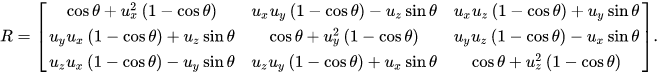

In [11]:
# Suppose we have rotation angle a (rad) along vector alpha = [alpha_1, alpha_2, alpha_3]

# Dummy test --> should return (phi,theta,psi) = (1.570, 0.785, 1.570)
#R = np.array([[0.,0., 1.],[0.71, 0.71, 0.], [-0.71, 0.71, 0.]]) # rotation matrix

# Actual alpha_1, _2, _3 and a magnitude will be returned from above step
# Example values
alpha_1, alpha_2, alpha_3 = 1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)
a = 0.5 # radian

# See formula above 
def build_rotation_matrix(theta, vector):
    """
       theta is angle in radian, vector [3 elements] is normalized rotation axis
       returns 3x3 R matrix
    """
    R11 = math.cos(theta)+vector[0]**2*(1-math.cos(theta))
    R12 = vector[0]*vector[1]*(1-math.cos(theta)) - vector[2]*math.sin(theta)
    R13 = vector[0]*vector[2]*(1-math.cos(theta)) + vector[1]*math.sin(theta)
    R21 = vector[1]*vector[0]*(1-math.cos(theta)) + vector[2]*math.sin(theta)
    R22 = math.cos(theta)+vector[1]**2*(1-math.cos(theta))
    R23 = vector[1]*vector[2]*(1-math.cos(theta)) + vector[0]*math.sin(theta)
    R31 = vector[2]*vector[0]*(1-math.cos(theta)) + vector[1]*math.sin(theta)
    R32 = vector[2]*vector[1]*(1-math.cos(theta)) + vector[0]*math.sin(theta)
    R33 = math.cos(theta)+vector[2]**2*(1-math.cos(theta))
    
    R = np.array([[R11, R12, R13],[R21, R22, R23],[R31, R32, R33]])
    return R


def get_euler_angles(R):
    """
       The Euler decomposition algorithm assumes XYZ rotation sequence 
       Not explicitly stated in Qiskit documentation, but no other sequence mentioned either
       R is rotation matrix of angle a along some vector alpha
       returns [euler_1, euler_2, euler_3] angles as phi, theta, psi
    """
    tol = 10**(-10)
    if abs(R[0][0]) < tol and abs(R[1][0]) < tol:
        euler_1 = 0
        euler_2 = math.atan2(-R[2][0], R[0][0])
        euler_3 = math.atan2(-R[1][2], R[1][1])
    else:
        euler_1 = math.atan2(R[1][0], R[0][0])
        euler_2 = math.atan2(-R[2][0], math.cos(euler_1)*R[0][0] + math.sin(euler_1)*R[1][0])
        euler_3 = math.atan2(math.sin(euler_1)*R[0][2] - math.cos(euler_1)*R[1][2], 
                             math.cos(euler_1)*R[1][1] - math.sin(euler_1)*R[0][1])
    return np.array([euler_1, euler_2, euler_3])


R = build_rotation_matrix(a, np.array([alpha_1,alpha_2,alpha_3]))
test_results = get_euler_angles(R)

print("Euler angles:")
print("phi:", test_results[0])
print("theta:", test_results[1])
print("psi:", test_results[2])


Euler angles:
phi: 0.3329512119831549
theta: -0.31588941883353133
psi: -0.20485279779276885
